In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [27]:
df=pd.read_csv('multiTimeline.csv',skiprows=1)
df.head(10)

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44
7,2004-08,59,28,44
8,2004-09,53,25,44
9,2004-10,52,24,45


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


<h1>wrangling data</h1>

In [29]:
df.columns=['Month','diet','gym','finance']
df.head(10)

,Month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44
7,2004-08,59,28,44
8,2004-09,53,25,44
9,2004-10,52,24,45


In [30]:
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [31]:
df.set_index('Month',inplace=True)
df.head()

,diet,gym,finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


<h1>Explaratory data analysis</h1>

<AxesSubplot:xlabel='Month'>

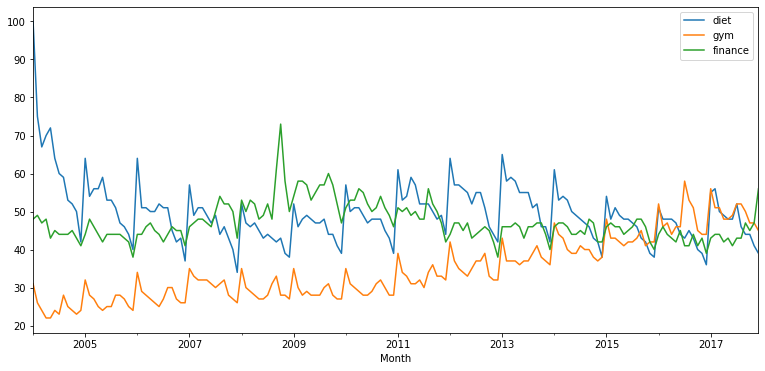

In [38]:
df.plot(figsize=(13,6))

<AxesSubplot:xlabel='Month'>

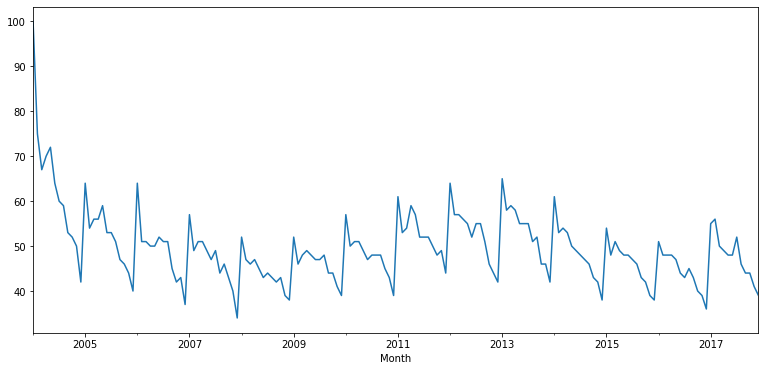

In [39]:
df['diet'].plot(figsize=(13,6))

<AxesSubplot:xlabel='Month'>

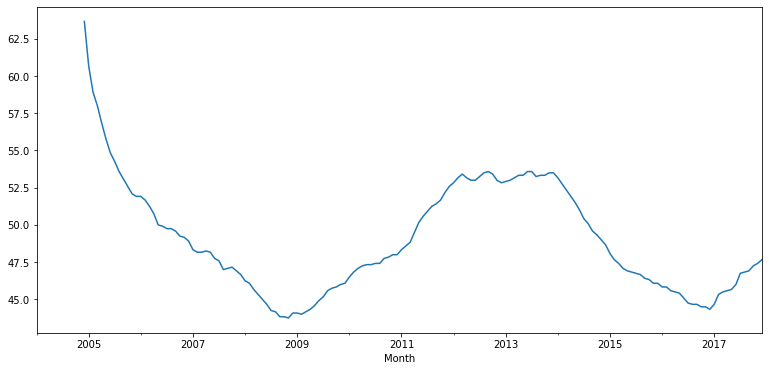

In [47]:
#converting seasonal to trend for smoothing data (cleared data)
df['diet'].rolling(12).mean().plot(figsize=(13,6))

>>The interest in the diet was very great before 2005 and decreased after that 

<AxesSubplot:xlabel='Month'>

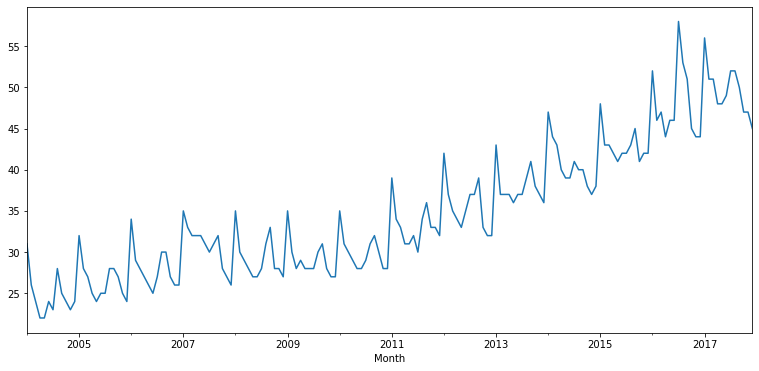

In [41]:
df['gym'].plot(figsize=(13,6))

<AxesSubplot:xlabel='Month'>

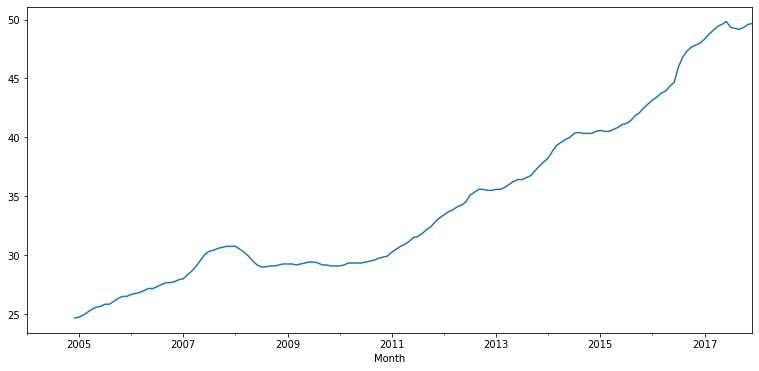

In [42]:
df['gym'].rolling(12).mean().plot(figsize=(13,6))

>>The interest in the gym has gradually increased since 2005 until now unlike diet.

<AxesSubplot:xlabel='Month'>

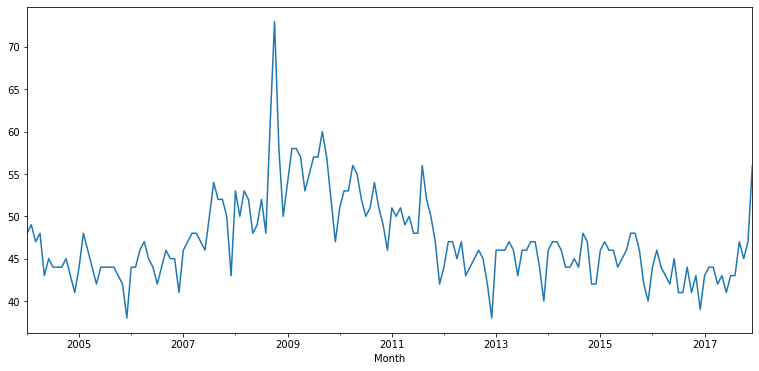

In [44]:
df['finance'].plot(figsize=(13,6))

<AxesSubplot:xlabel='Month'>

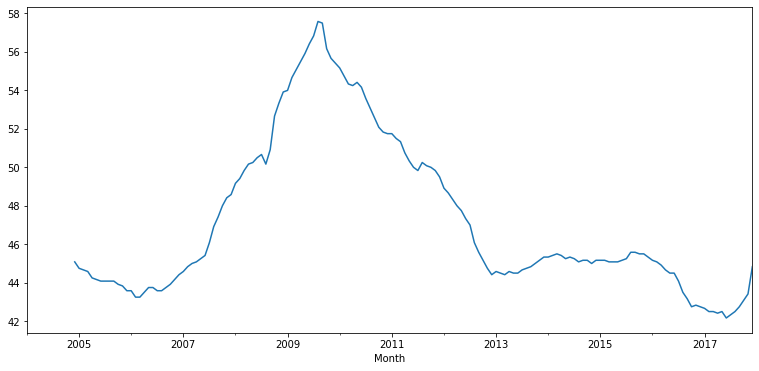

In [46]:
df['finance'].rolling(12).mean().plot(figsize=(13,6))

>>the most interest in finance was in 2009 (in and after the great economic recession of 2008).

<AxesSubplot:xlabel='Month'>

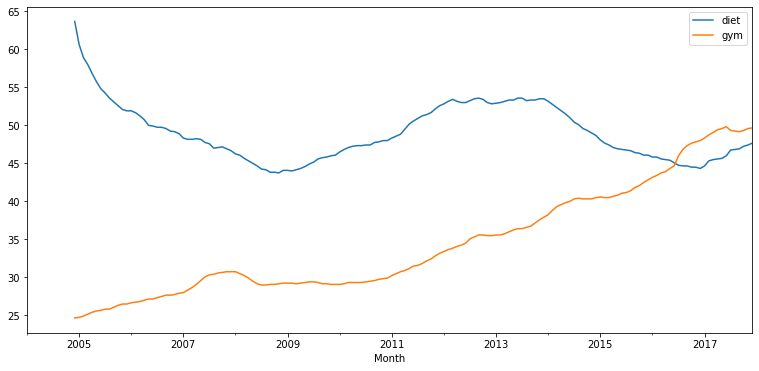

In [71]:
pd.concat([df['diet'].rolling(12).mean(),df['gym'].rolling(12).mean()],axis=1).plot(figsize=(13,6))

>> the interest in both diet and gym is gradually increasing starting from 2017 until now.

<AxesSubplot:xlabel='Month'>

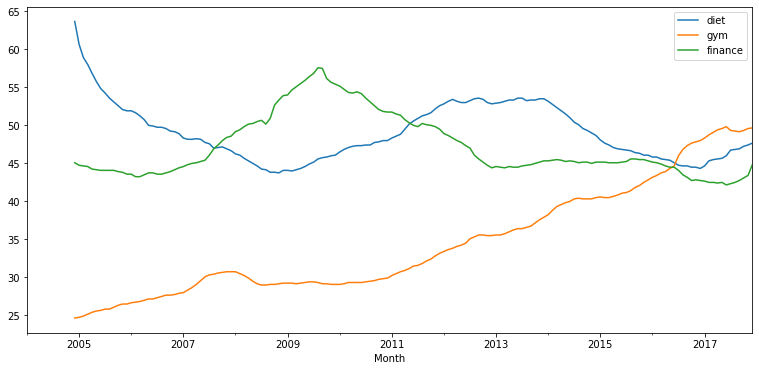

In [51]:
pd.concat([df['diet'].rolling(12).mean(),df['gym'].rolling(12).mean(),df['finance'].rolling(12).mean()],
          axis=1).plot(figsize=(13,6))

>> the interest in diet, gym and finance was equal in 2017.

In [55]:
df.corr().round(2)

,diet,gym,finance
diet,1.00,-0.10,-0.03
gym,-0.10,1.00,-0.28
finance,-0.03,-0.28,1.00


,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


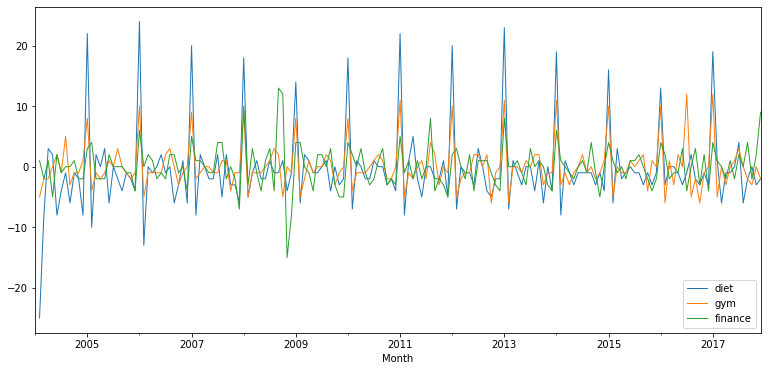

In [70]:
df.diff().plot(figsize=(13,6), linewidth=1, fontsize=10)
df.diff().corr()

>>correlation between diet and gym is high